# Activity 2.3 - CNN Network Architectures

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [37]:
# install opencv if you haven't
# pip install opencv-python
# pip install pillow

In [38]:
from PIL import Image
import keras.utils as image
import numpy as np
import pandas as pd

import cv2
#from scipy.misc.pilutil import imread

import matplotlib.pyplot as plt


Create a function that will capture and save the image from your webcam

In [39]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [40]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [41]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

In [49]:
img_path = "webcam_test_img_resize_1.png"

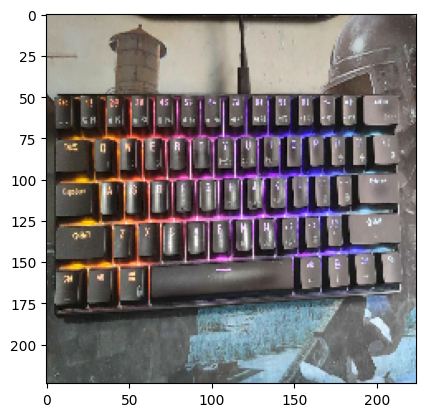

In [50]:
plt.imshow(cv2.imread(img_path))

Use VGG-16 pre-trained model

In [51]:
from keras.applications import vgg16

vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Create a function to load model, image, preprocess input and targets

In [52]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [53]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 0s 103ms/step


,Predicted Class,Name,Probability
0,n04505470,typewriter_keyboard,0.522452
1,n04264628,space_bar,0.267390
2,n03085013,computer_keyboard,0.195092
3,n04372370,switch,0.002795
4,n03793489,mouse,0.001508
5,n04525305,vending_machine,0.000764
6,n03255030,dumbbell,0.000557
7,n07615774,ice_lolly,0.000506
8,n02672831,accordion,0.000447
9,n04200800,shoe_shop,0.000413


Interpret the result of prediction using VGG16 model

#type your answer here

Use Resnet50 pretrained model

In [54]:
from tensorflow.keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_9[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

Predict the result

In [55]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 [==============================] - 1s 572ms/step


,Predicted Class,Name,Probability
0,n03085013,computer_keyboard,0.736779
1,n04505470,typewriter_keyboard,0.154232
2,n04264628,space_bar,0.102435
3,n02892201,brass,0.001018
4,n03485407,hand-held_computer,0.000773
5,n04192698,shield,0.000665
6,n02992529,cellular_telephone,0.000655
7,n03793489,mouse,0.000654
8,n02895154,breastplate,0.000181
9,n04525305,vending_machine,0.000129


Interpret the result using RESNET50 pretrained model

#type your answer here

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image. 
* Compare their accuracy results.

**Use Resnet101 model**

In [58]:
#### type your code here

from keras.applications import resnet

resnet101_model = resnet.ResNet101(weights='imagenet')
resnet101_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_11[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [59]:
predict_image(resnet101_model, img_path, resnet.preprocess_input, resnet.decode_predictions)

1/1 [==============================] - 1s 1s/step


,Predicted Class,Name,Probability
0,n04505470,typewriter_keyboard,0.384454
1,n03085013,computer_keyboard,0.238940
2,n04264628,space_bar,0.146829
3,n04525305,vending_machine,0.069540
4,n02992529,cellular_telephone,0.032714
5,n02895154,breastplate,0.012803
6,n03710193,mailbox,0.012749
7,n03000247,chain_mail,0.012749
8,n03146219,cuirass,0.011366
9,n03075370,combination_lock,0.010771


**Using DenseNet121 model**

In [61]:
from keras.applications import densenet

densenet121_model = densenet.DenseNet201()
densenet121_model.summary()

82524592/82524592 [==============================] - 4s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_12[0][0]']               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

In [62]:
predict_image(densenet121_model, img_path, densenet.preprocess_input, densenet.decode_predictions)

1/1 [==============================] - 6s 6s/step


,Predicted Class,Name,Probability
0,n03085013,computer_keyboard,0.503893
1,n04505470,typewriter_keyboard,0.146694
2,n04264628,space_bar,0.079343
3,n04525305,vending_machine,0.037199
4,n04258138,solar_dish,0.025627
5,n03764736,milk_can,0.019290
6,n03000247,chain_mail,0.017233
7,n03146219,cuirass,0.014061
8,n04557648,water_bottle,0.006755
9,n04423845,thimble,0.006625


**Using VGG19 model**

In [68]:
from keras.applications import vgg19

vgg19_model = vgg19.VGG19(weights='imagenet')
vgg19_model.summary()

574710816/574710816 [==============================] - 24s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [69]:
predict_image(vgg19_model, img_path, vgg19.preprocess_input, vgg19.decode_predictions)

1/1 [==============================] - 0s 112ms/step


,Predicted Class,Name,Probability
0,n04505470,typewriter_keyboard,0.416031
1,n04264628,space_bar,0.284001
2,n03085013,computer_keyboard,0.211984
3,n04074963,remote_control,0.030233
4,n02992529,cellular_telephone,0.011957
5,n02966687,carpenter's_kit,0.004057
6,n02666196,abacus,0.003633
7,n03485407,hand-held_computer,0.003580
8,n03075370,combination_lock,0.003332
9,n02892201,brass,0.002484


#### Conclusion

#type your answer here